-0.7376627261740146 -7.718550289315095e-16


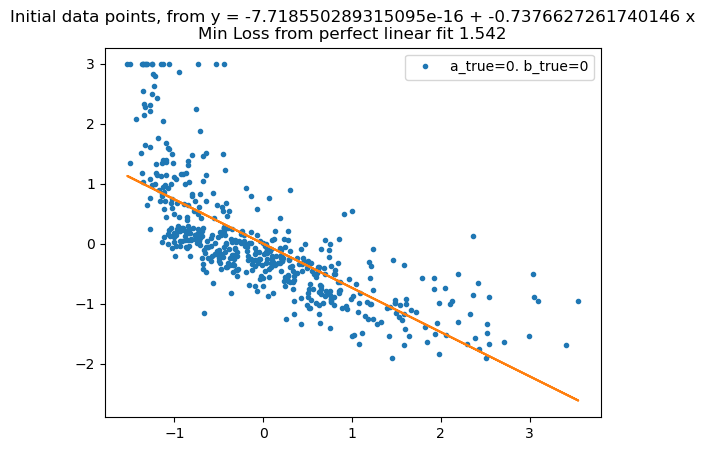

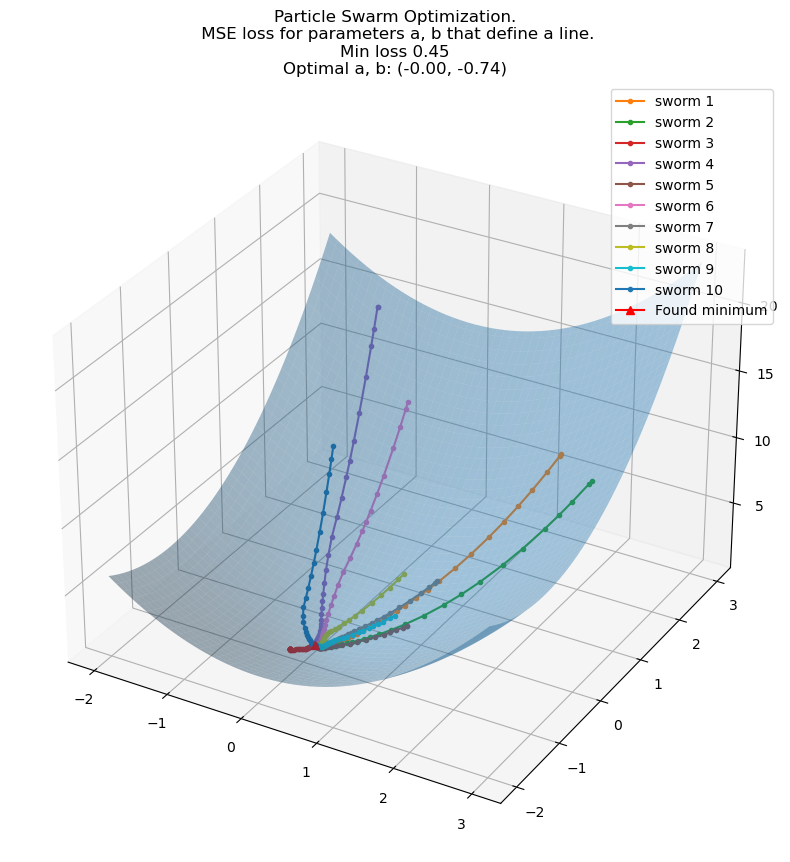

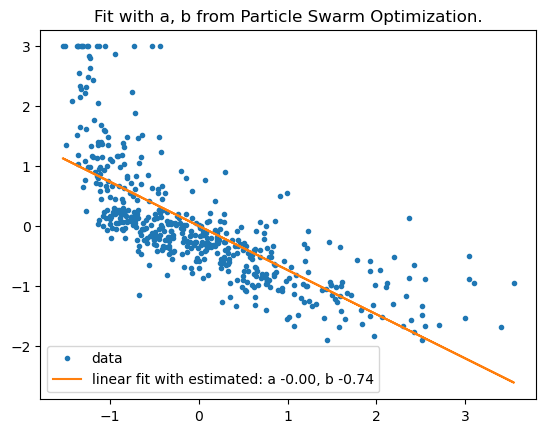

[-0.00099757 -0.7356043 ]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(20)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from ISLP import load_data


# df = pd.read_csv("LR/train.csv")
# x = df["x"]
# y = df["y"]
df = load_data('Boston')
xq = df["lstat"]
yq = df["medv"]

# x = (xq - np.min(xq))/(np.max(xq) - np.min(xq))
# y = (yq - np.min(yq))/(np.max(yq) - np.min(yq))
x = (xq-xq.mean())/xq.std()
y = (yq-yq.mean())/yq.std()
a_true = np.sum((x -x.mean()) * (y - y.mean())) /  np.sum((x -x.mean()) ** 2)
b_true = y.mean() - a_true*x.mean()

print(a_true, b_true)
error = np.random.normal(size=100) * 0.5
xs = x
ys = y
min_loss = np.mean((a_true + b_true * xs - ys) ** 2)
data = xs, ys

### Plot data points
title = f'Initial data points, from y = {b_true} + {a_true} x'
title += '\nMin Loss from perfect linear fit %0.3f' % min_loss
plt.title(title)
plt.plot(xs, ys, '.', label='a_true=%d. b_true=%d' % (a_true, b_true))
plt.plot(xs, b_true + a_true * xs, "-")
plt.legend()
plt.show()


### Calculate loss function using MSE formula
c_a2 = 1
c_ab = 2 * xs.mean()
c_b2 = np.mean(xs ** 2)
c_0 = np.mean(ys ** 2)
c_a = -2 * ys.mean()
c_b = -2 * np.mean(xs * ys)


### Define loss for a, b
def loss(a,b):
    return a ** 2 * c_a2 + a * b * c_ab + b ** 2 * c_b2 + c_0 + a * c_a + b * c_b


def find_best(ps):
    ### given particles, return best
    min_loss, best_p = min((loss(*ps[i]), ps[i]) for i in range(len(ps)))
    return min_loss, best_p


def particle_swarm_optimization(N = 50, M = 100, w = 0.7, c1 = 0.05, c2 = 0.05, left_search=0, right_search=3):
    ### generate r1, r2 in advance
    r1_vals = np.random.uniform(size=(M, N))
    r2_vals = np.random.uniform(size=(M, N))

    ### generate initial particle locations, and their velocity as zero
    ps = np.random.uniform(low = left_search, high = right_search, size=(N, 2))
    vs = np.zeros(shape=(N, 2))
    ps_best = ps.copy()

    ### keep paths of particles for a plot
    paths = [[ps[i].copy()] for i in range(N)]

    for t in range(M):
        _, bp = find_best(ps_best)

        for i in range(N):
            r1 = r1_vals[t][i]
            r2 = r2_vals[t][i]

            ### update formula
            vs[i] = w * vs[i] + c1 * r1 * (ps_best[i] - ps[i]) + c2 * r2 * (bp - ps[i])
            ps[i] = ps[i] + vs[i]

            ### add to path and update best for i swarm
            paths[i].append(ps[i].copy())
            if loss(*ps[i]) < loss(*ps_best[i]):
                ps_best[i] = ps[i]

    min_loss, bp = find_best(ps_best)
    return min_loss, bp, paths


N = 10
left_search, right_search = (-2,3)
min_loss, bp, paths = particle_swarm_optimization(N, left_search = left_search, right_search = right_search)

### Plot background surface
linspace = np.linspace(left_search, right_search, 100)
xs, ys = np.meshgrid(linspace, linspace)
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(projection='3d')
ax1.plot_surface(xs, ys, loss(xs, ys), alpha=0.4)

## Plot particles' paths
for i in range(N):
    xs, ys = zip(*paths[i])
    xs, ys = np.array(xs), np.array(ys)
    ax1.plot(xs, ys, loss(xs, ys), label='sworm %d' % (i + 1), marker = '.')

### Plot minimum
ax1.plot([bp[0]], [bp[1]], [loss(*bp)], label='Found minimum', marker = '^', color='red')

### Define title and show
title = 'Particle Swarm Optimization.'
title += '\n MSE loss for parameters a, b that define a line.'
title += '\nMin loss %0.2f' % min_loss
title += '\nOptimal a, b: (%0.2f, %0.2f)' % tuple(bp)

plt.title(title)
plt.legend()
plt.show()


### Final fit
xs, ys = data
a_est, b_est = bp
plt.plot(xs, ys, '.', label='data')
plt.plot(xs, a_est + b_est * xs, '-', label='linear fit with estimated: a %0.2f, b %0.2f' % (a_est, b_est))
plt.title('Fit with a, b from Particle Swarm Optimization.')
plt.legend()
plt.show()
print(bp)

# Testing

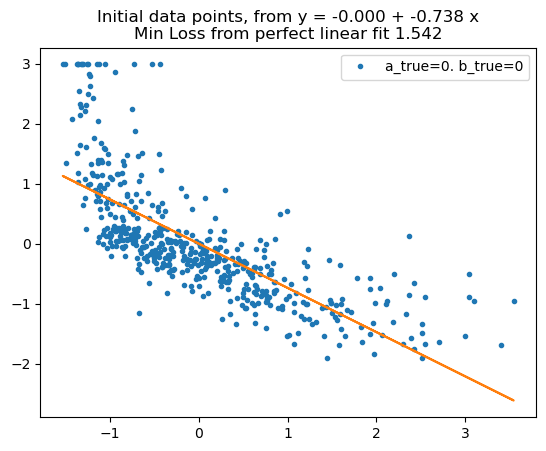

In [6]:
### Setuping
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from ISLP import load_data
np.random.seed(20)

df = load_data('Boston')
xq = df["lstat"]
yq = df["medv"]

x = (xq-xq.mean())/xq.std()
y = (yq-yq.mean())/yq.std()
a_true = np.sum((x -x.mean()) * (y - y.mean())) /  np.sum((x -x.mean()) ** 2)
b_true = y.mean() - a_true*x.mean()

error = np.random.normal(size=100) * 0.5
xs = x
ys = y
min_loss = np.mean((a_true + b_true * xs - ys) ** 2)
data = xs, ys

### Plot data points
title = 'Initial data points, from y = %0.3f + %0.3f x' % (b_true, a_true)
title += '\nMin Loss from perfect linear fit %0.3f' % min_loss
plt.title(title)
plt.plot(xs, ys, '.', label='a_true=%d. b_true=%d' % (a_true, b_true))
plt.plot(xs, b_true + a_true * xs, "-")
plt.legend()
plt.show()


### Calculate loss function using MSE formula
c_a2 = 1
c_ab = 2 * xs.mean()
c_b2 = np.mean(xs ** 2)
c_0 = np.mean(ys ** 2)
c_a = -2 * ys.mean()
c_b = -2 * np.mean(xs * ys)


### Define loss for a, b
def loss(a,b):
    return a ** 2 * c_a2 + a * b * c_ab + b ** 2 * c_b2 + c_0 + a * c_a + b * c_b

def find_best(ps):
    ### given particles, return best
    min_loss, best_p = min((loss(*ps[i]), ps[i]) for i in range(len(ps)))
    return min_loss, best_p


def particle_swarm_optimization(N = 50, M = 100, w = 0.7, c1 = 0.05, c2 = 0.05, left_search=0, right_search=3):
    ### generate r1, r2 in advance
    r1_vals = np.random.uniform(size=(M, N))
    r2_vals = np.random.uniform(size=(M, N))

    ### generate initial particle locations, and their velocity as zero
    ps = np.random.uniform(low = left_search, high = right_search, size=(N, 2))
    vs = np.zeros(shape=(N, 2))
    ps_best = ps.copy()

    ### keep paths of particles for a plot
    paths = [[ps[i].copy()] for i in range(N)]

    for t in range(M):
        _, bp = find_best(ps_best)

        for i in range(N):
            r1 = r1_vals[t][i]
            r2 = r2_vals[t][i]

            ### update formula
            vs[i] = w * vs[i] + c1 * r1 * (ps_best[i] - ps[i]) + c2 * r2 * (bp - ps[i])
            ps[i] = ps[i] + vs[i]

            ### add to path and update best for i swarm
            paths[i].append(ps[i].copy())
            if loss(*ps[i]) < loss(*ps_best[i]):
                ps_best[i] = ps[i]

    min_loss, bp = find_best(ps_best)
    return min_loss, bp, paths

RUNNING WITH PARAMETERS N = 3, M = 50,w = 0.8, c1,c2 = 0.05


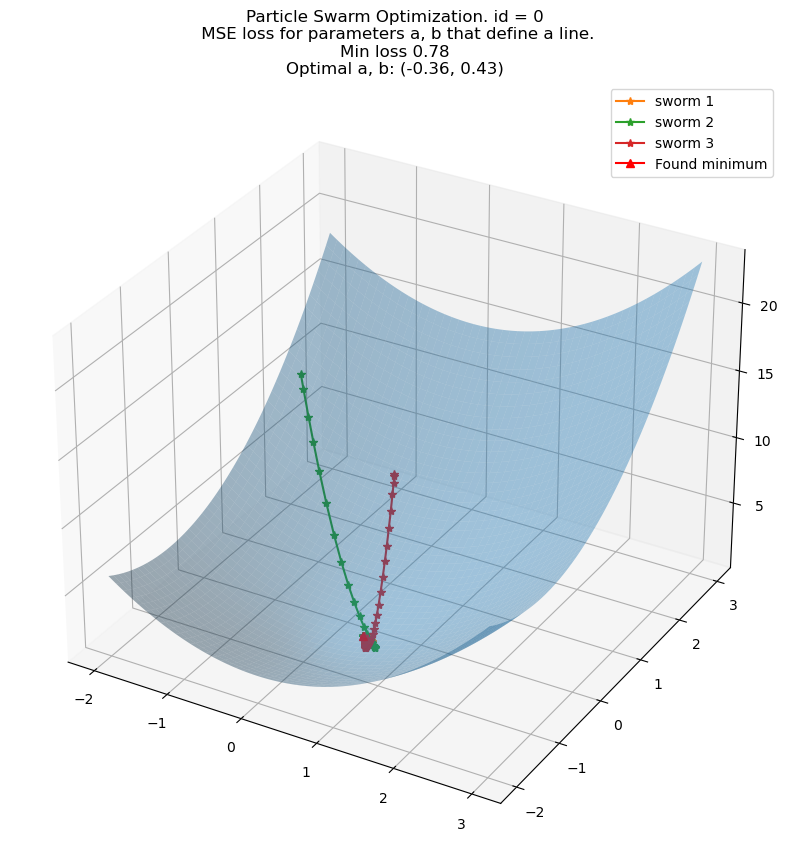

RUNNING WITH PARAMETERS N = 6, M = 87,w = 0.8250000000000001, c1,c2 = 0.1125


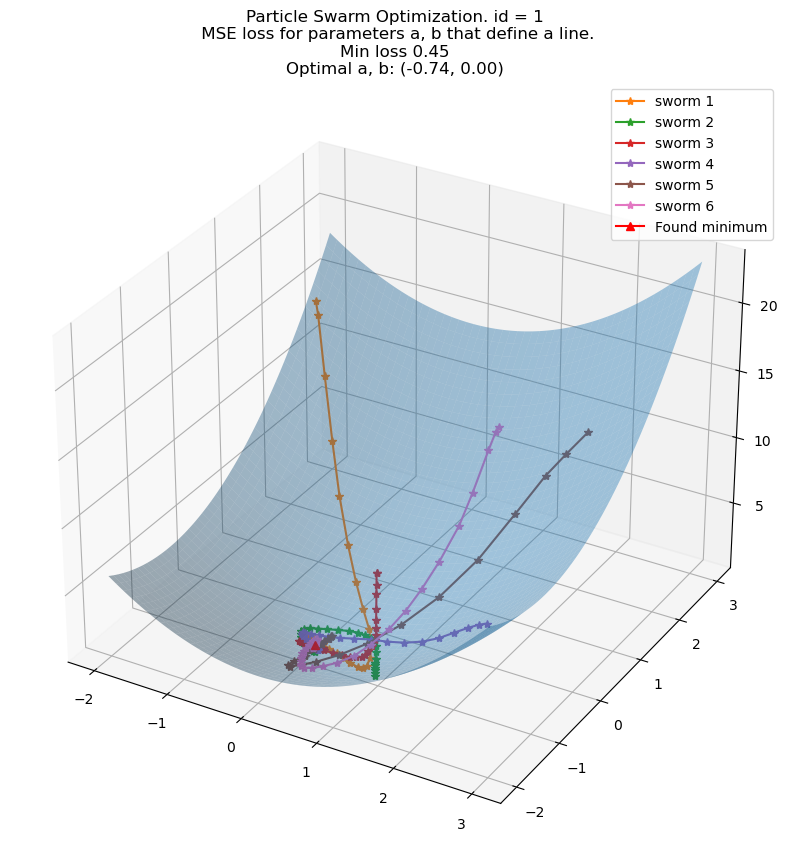

RUNNING WITH PARAMETERS N = 9, M = 125,w = 0.8500000000000001, c1,c2 = 0.175


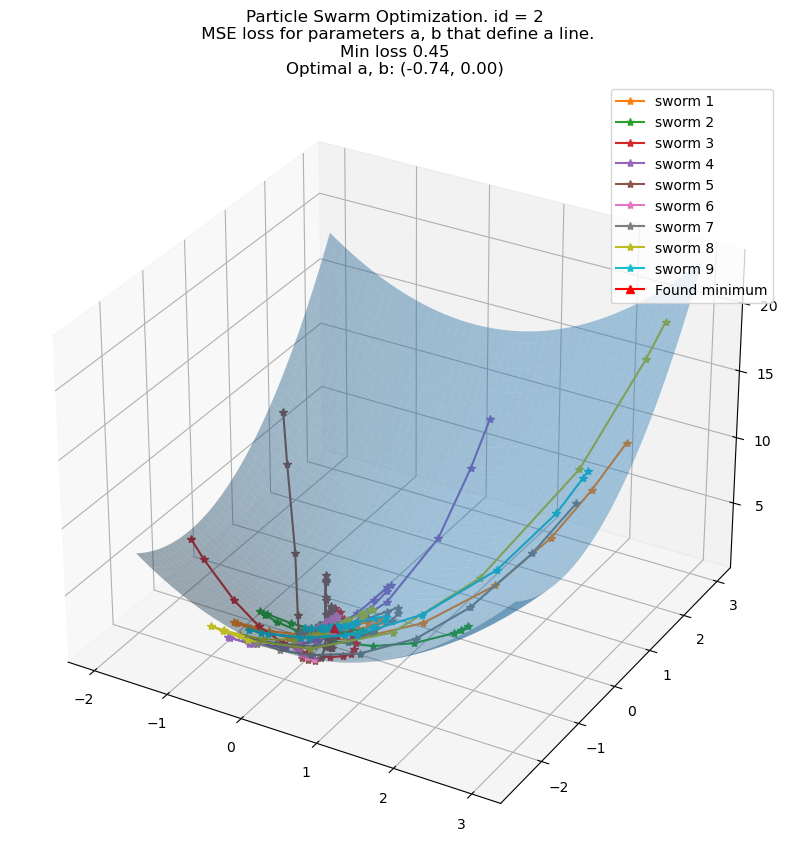

RUNNING WITH PARAMETERS N = 12, M = 162,w = 0.875, c1,c2 = 0.2375


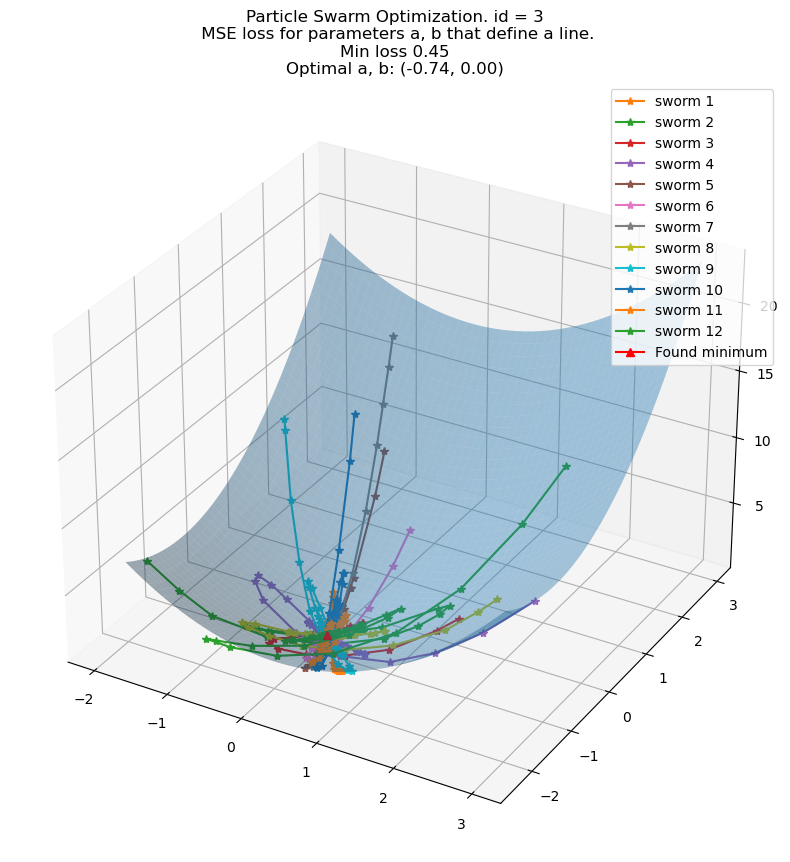

RUNNING WITH PARAMETERS N = 15, M = 200,w = 0.9, c1,c2 = 0.3


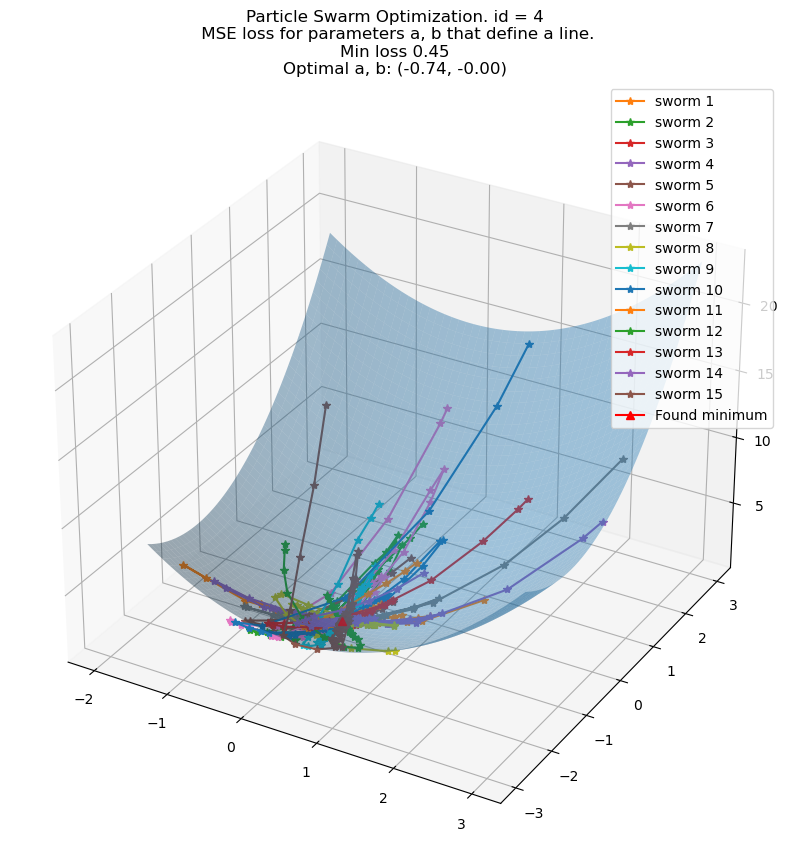

In [63]:
### testing parameters
SWARM_NUM = [int(i) for i in np.linspace(3,15,5)]
ITER_NUM = [int(i) for i in np.linspace(50,200,5)]
WEIGHTS = np.linspace(0.8, 0.9, 5)
COEFS = np.linspace(0.05, 0.3, 5)
INIT_LEFT = -2
INIT_RIGHT = 3

results = pd.DataFrame(columns = ["id","N", "M", "w", "coef", "a", "b"])
for i in range(len(SWARM_NUM)):
    print(f"RUNNING WITH PARAMETERS N = {SWARM_NUM[i]}, M = {ITER_NUM[i]},w = {WEIGHTS[i]}, c1,c2 = {COEFS[i]}")
    min_loss, bp, paths = particle_swarm_optimization(SWARM_NUM[i], ITER_NUM[i], w = WEIGHTS[i], c1 = COEFS[i], c2 = COEFS[i], left_search = INIT_LEFT, right_search = INIT_RIGHT)
    linspace = np.linspace(INIT_LEFT, INIT_RIGHT, 1000)
    xs, ys = np.meshgrid(linspace, linspace)
    fig = plt.figure(figsize=(10, 10))
    ax1 = fig.add_subplot(projection='3d')
    ax1.plot_surface(xs, ys, loss(xs, ys), alpha=0.4)
    
    ## Plot particles' paths
    for j in range(SWARM_NUM[i]):
        xs, ys = zip(*paths[j])
        xs, ys = np.array(xs), np.array(ys)
        ax1.plot(xs, ys, loss(xs, ys), label='sworm %d' % (j + 1), marker = '*')
    ### Plot minimum
    ax1.plot([bp[0]], [bp[1]], [loss(*bp)], label='Found minimum', marker = '^', color='red')
    
    ### Define title and show
    title = f'Particle Swarm Optimization. id = {i}'
    title += '\n MSE loss for parameters a, b that define a line.'
    title += '\nMin loss %0.2f' % min_loss
    title += '\nOptimal a, b: (%0.2f, %0.2f)' % tuple(bp[::-1])
    df2 = pd.DataFrame([[i, SWARM_NUM[i], ITER_NUM[i], WEIGHTS[i], COEFS[i],bp[1],bp[0]]], columns=["id","N", "M", "w", "coef", "a", "b"])
    results = pd.concat([results, df2])
    plt.title(title)
    plt.legend()
    plt.show()

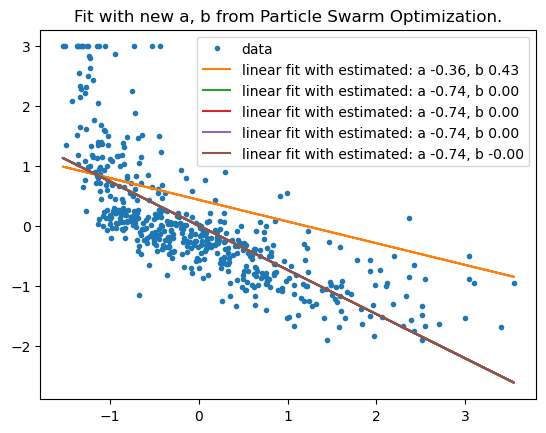

,id,N,M,w,coef,a,b
0,0,3,50,0.800,0.0500,-0.361987,0.430613
0,1,6,87,0.825,0.1125,-0.737669,0.000019
0,2,9,125,0.850,0.1750,-0.737660,0.000004
0,3,12,162,0.875,0.2375,-0.737661,0.000002
0,4,15,200,0.900,0.3000,-0.737663,-0.000005


In [69]:
results
xs, ys = data
plt.plot(xs, ys, '.', label='data')
for i in range(len(results["a"].to_list())):
    a_est, b_est = results["a"].to_list()[i], results["b"].to_list()[i]
    plt.plot(xs, b_est + a_est * xs, '-', label='linear fit with estimated: a %0.2f, b %0.2f' % (a_est, b_est))
plt.title('Fit with new a, b from Particle Swarm Optimization.')
plt.legend()
plt.show()
results

# Analyzing answers

In [84]:
for a, b in zip(results["a"], results["b"]):
    error = (np.abs(a-a_true), np.abs(b-b_true))
    print(f"Absolute errors of (a,b) from true values = {error}")
print("\nThe answers were given to the same dataset (Boston dataset) with the same boundary conditions")

Absolute errors of (a,b) from true values = (0.375675400676523, 0.43061253288379286)
Absolute errors of (a,b) from true values = (5.786335017465838e-06, 1.908341217672664e-05)
Absolute errors of (a,b) from true values = (3.1877244296429907e-06, 3.7100356091429008e-06)
Absolute errors of (a,b) from true values = (2.0437216976532113e-06, 1.7153851936682125e-06)
Absolute errors of (a,b) from true values = (6.228041247169358e-07, 5.2325067203381695e-06)

The answers were given to the same dataset (Boston dataset) with the same boundary conditions
